<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/viola_matias_parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

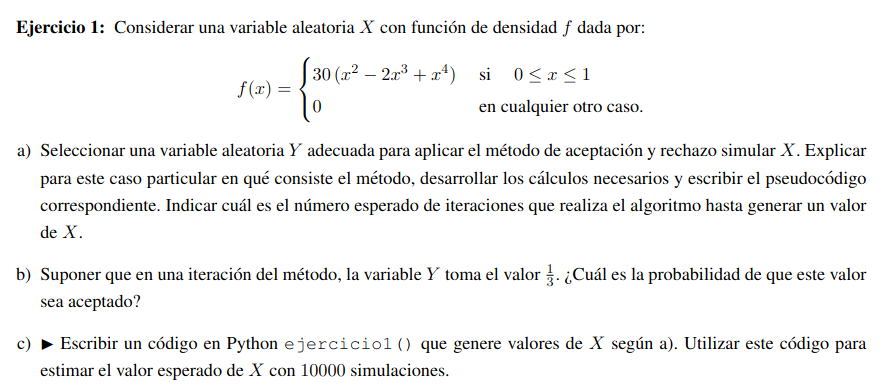

In [11]:
from random import random

In [12]:
def f(x):
  return 30 * (x**2 - 2*x**3 + x**4)

C = 1.875
def ejercicio1():
  while True:
    muestra = random()
    p_propuesta = 1
    p_objetivo = f(muestra)
    if random() <= p_objetivo / (p_propuesta * C):
      return muestra

In [13]:
NUMERO_DE_MUESTRAS = 100_000
muestras_ej1 = [ejercicio1() for _ in range(NUMERO_DE_MUESTRAS)]

esperanza = sum(muestras_ej1) / NUMERO_DE_MUESTRAS
print('Valor esperado estimado de X: ', esperanza)

Valor esperado estimado de X:  0.49979108937921


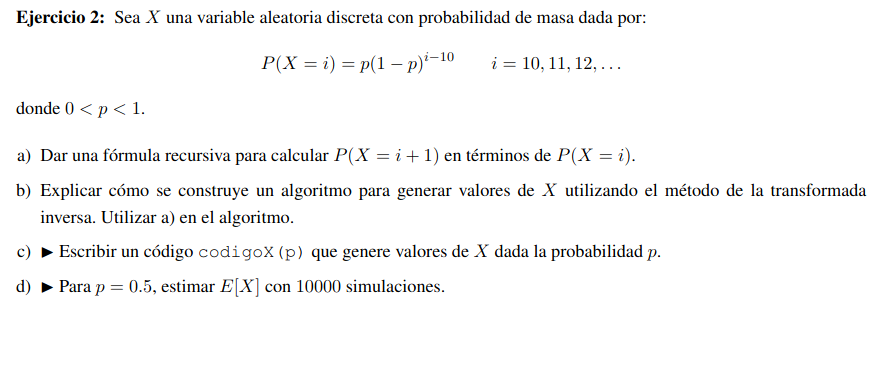

In [14]:
import numpy as np

In [19]:
# Aca tome un atajo, pero tambien se puede hacer como vimos en el teorico para la formula de muestreador_geometrica_TI(p)
# o mas facil, con TI buscando la F(x) y luego la F⁻¹(u) ... :
# P(X = i) = p(1 - p)**(i - 10) = p(1 - p)**((i - 9) - 1) = P(Y = i−9) donde Y tiene dist Geom(p)
# la probabilidad de que X tome el valor i es igual a la probabilidad de que Y tome el valor i−9,
# lo que implica que: X = Y + 9

def muestreador_geometrica_TI(p):
  return int(np.log(1 - random()) / np.log(1 - p)) + 1

def codigoX(p):
  return muestreador_geometrica_TI(p) + 9

In [18]:
P = 0.5

muestras_codigoX = [codigoX(P) for _ in range(NUMERO_DE_MUESTRAS)]

esperanza_codigoX = sum(muestras_codigoX) / len(muestras_codigoX)

print('esperanza estimada de codigoX: ', esperanza_codigoX)

esperanza estimada de codigoX:  11.00076


## Chequeos auxiliares del parcial en general

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dom = np.linspace(0,1,1000)
y = [f(x) for x in dom]

sns.lineplot(x=dom, y=y, color='red', label='f(x)')
sns.histplot(muestras_ej1, stat='density', label='distribucion de muestras ejercicio1()')
plt.axhline(C, color='green', linestyle='--', label='C')
plt.legend()
plt.show()

In [ ]:
def iteraciones_ejercicio1():
  contador_de_iteraciones = 0
  while True:
    contador_de_iteraciones += 1
    muestra = random()
    p_propuesta = 1
    p_objetivo = f(muestra)
    if random() <= p_objetivo / (p_propuesta * C):
      return contador_de_iteraciones

muestras_iteraciones = [iteraciones_ejercicio1() for _ in range(NUMERO_DE_MUESTRAS)]

esperanza_iteraciones = sum(muestras_iteraciones) / NUMERO_DE_MUESTRAS
print('numero medio estimado de itaraciones: ', esperanza_iteraciones)
print('numero medio real de itaraciones: ', C)

In [ ]:
def experimento_aceptar_y(y):
  muestra = y
  p_propuesta = 1
  p_objetivo = f(muestra)
  if random() <= p_objetivo / (p_propuesta * C):
    return 1
  else:
    return 0

muestras_aceptar_y = [experimento_aceptar_y(1/3) for _ in range(NUMERO_DE_MUESTRAS)]

esperanza_aceptar_y = sum(muestras_aceptar_y) / NUMERO_DE_MUESTRAS
print('probabilidad estimada de aceptar y=1/3: ', esperanza_aceptar_y)
print('probabilidad real de aceptar y=1/3: ', f(1/3)/C)